### Imports

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from math import ceil
from Ambrosia import pre_process_image
from skimage import io

In [2]:
# get path of image to ingest
wd = os.getcwd()
wd = "F:\Beetle_classification_deep_data\Phloeosinus_dentatus\Vial_18068\Subset_4"
# image_name = "IMG_0269_clean.JPG"
# image_name = "IMG_0046.JPG"
# image_name = "IMG_0014.JPG"
image_name = "IMG_0037.JPG"
wd_image_path =  wd+"/"+ image_name
image_path = wd_image_path

# Initialize compound image

In [3]:
# Initialize image
ppi = pre_process_image(image_dir = image_path, manual_thresh_buffer=0.15)

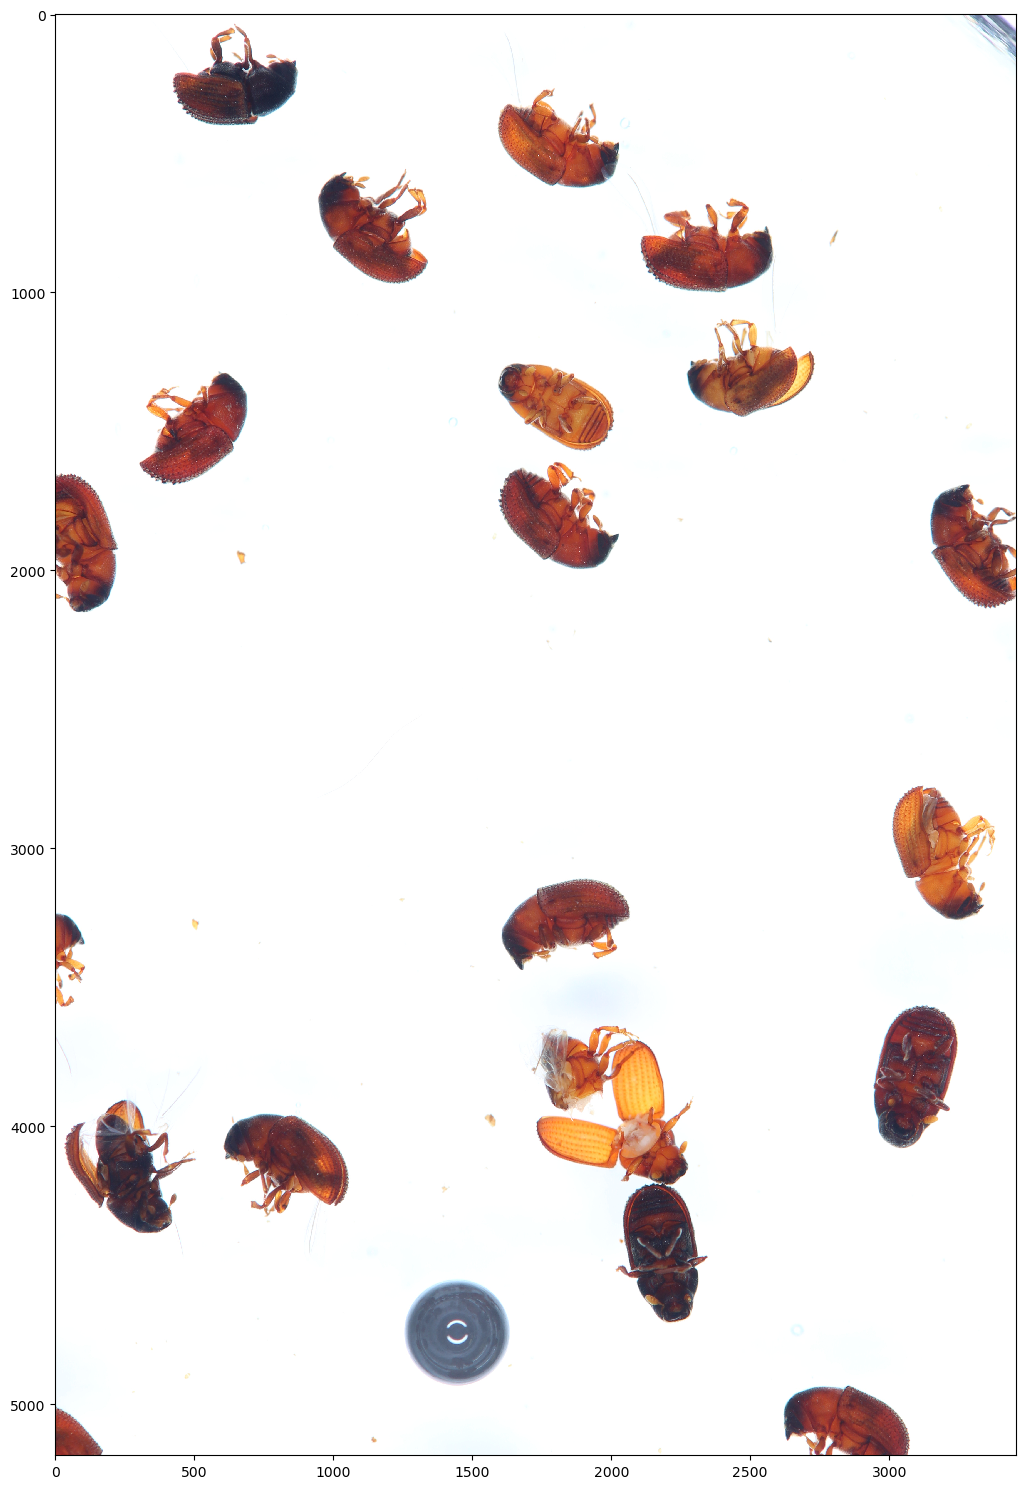

In [4]:
# input image
plt.figure(figsize=(15, 15))
io.imshow(ppi.image)
plt.show()

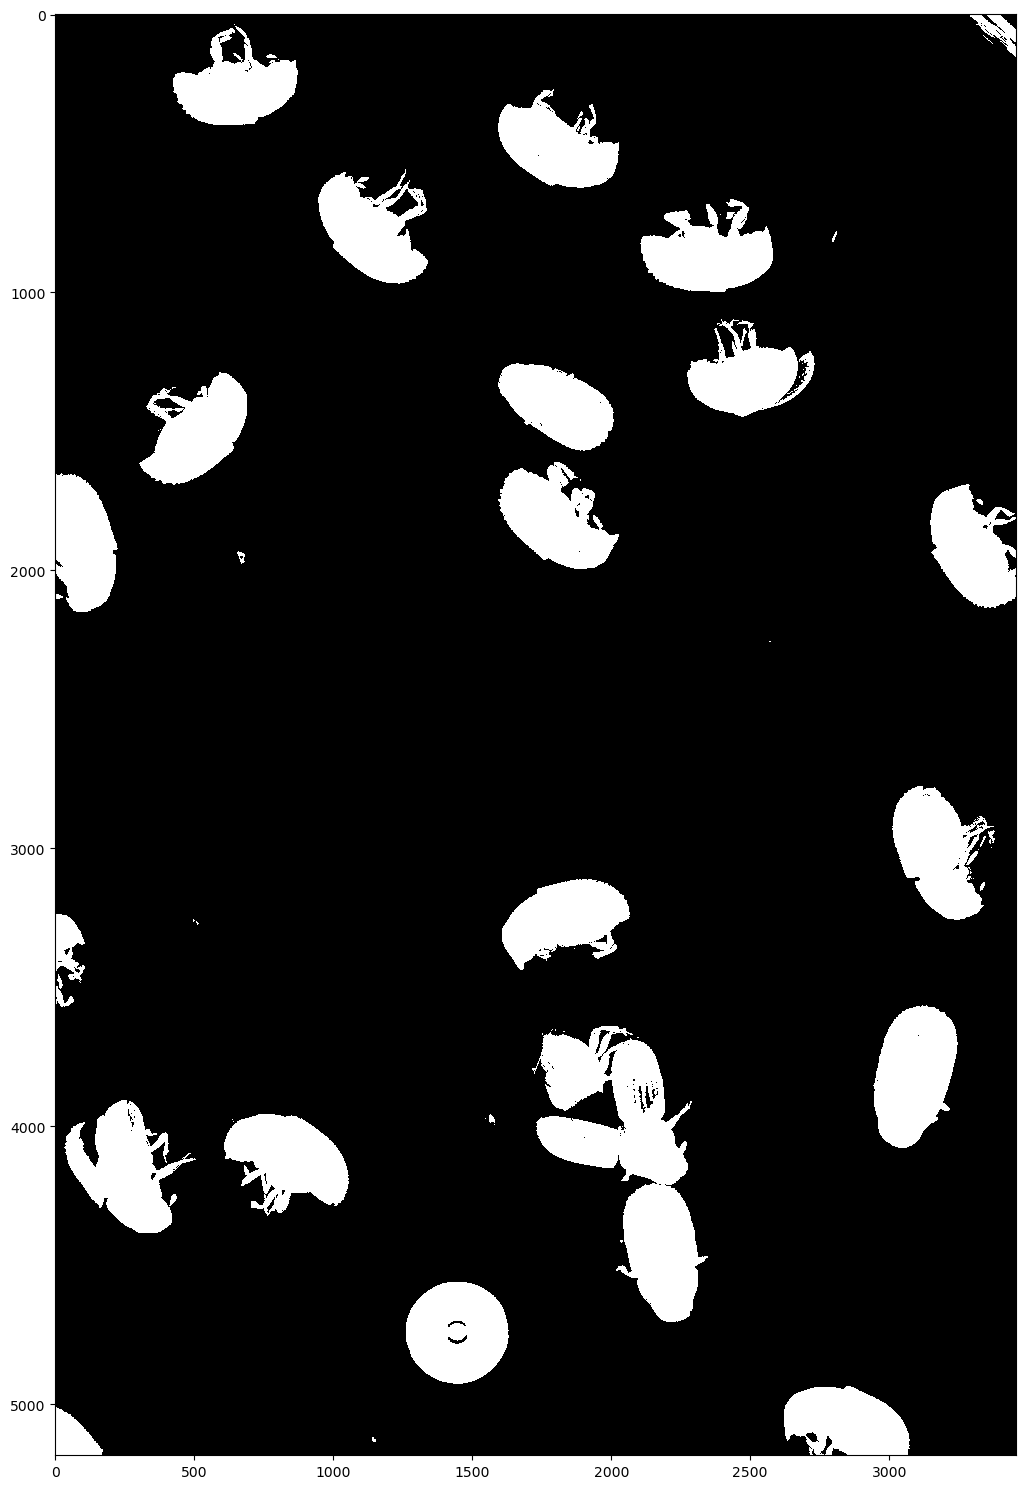

In [5]:
# input image
plt.figure(figsize=(15, 15))
io.imshow(ppi.inv_bw_image)
plt.show()

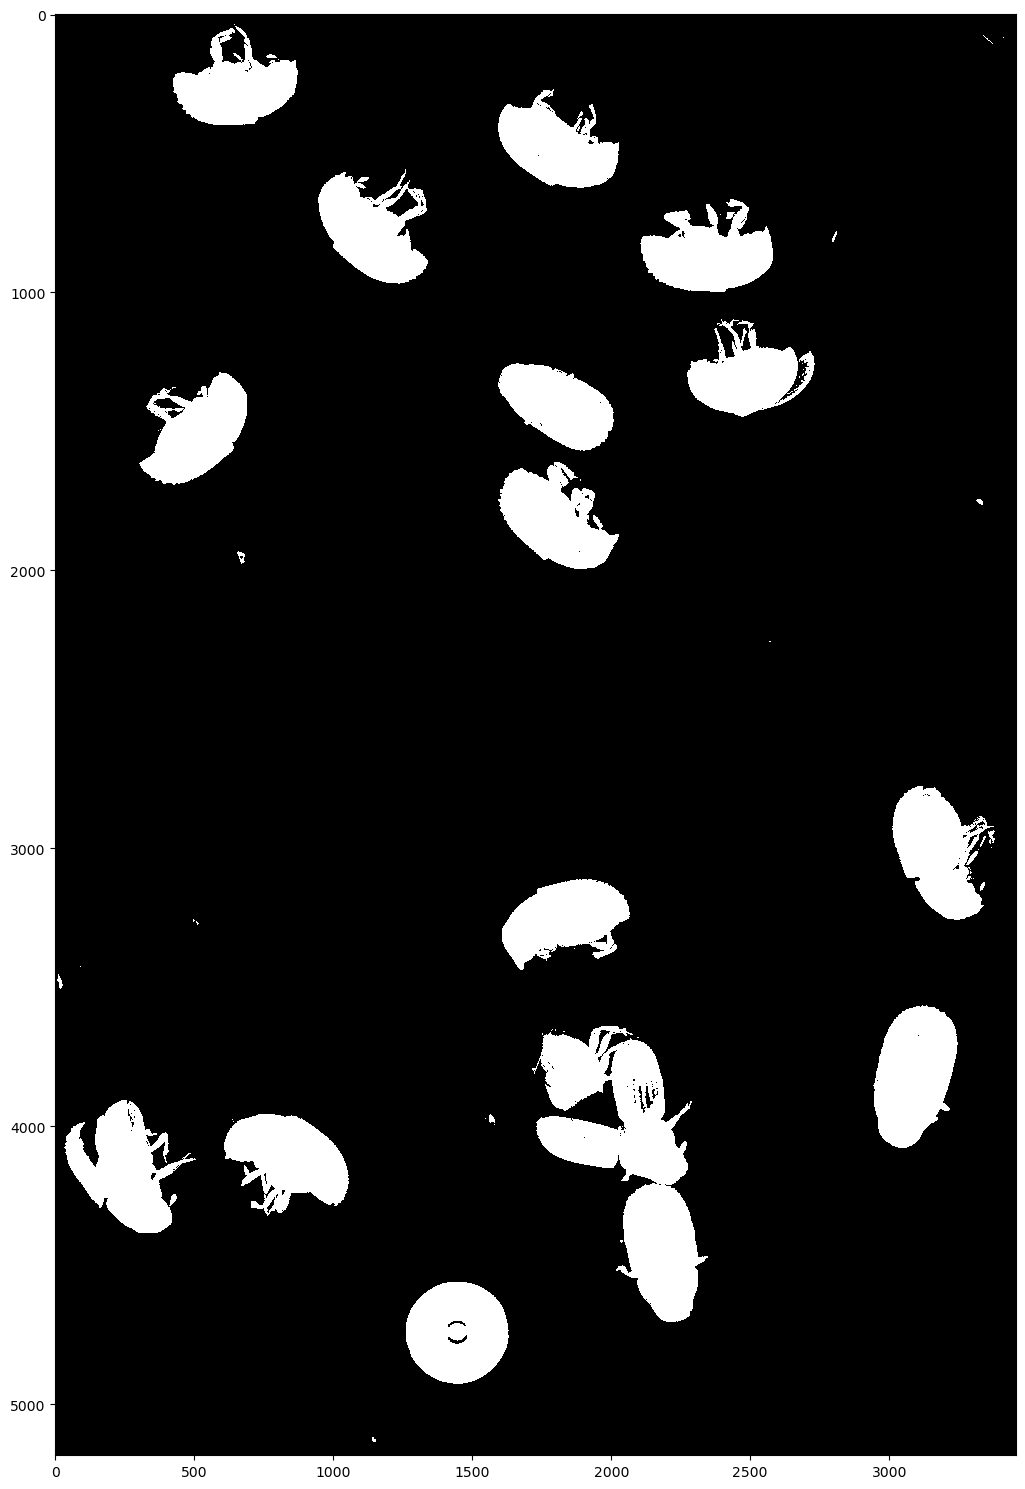

In [6]:
# input image
plt.figure(figsize=(15, 15))
io.imshow(ppi.clear_inv_bw_image)
plt.show()

# Segment compound image into smaller images

In [7]:
# apply segmentation of blobs in image
ppi.segment(cluster_num=2, image_edge_buffer=50)

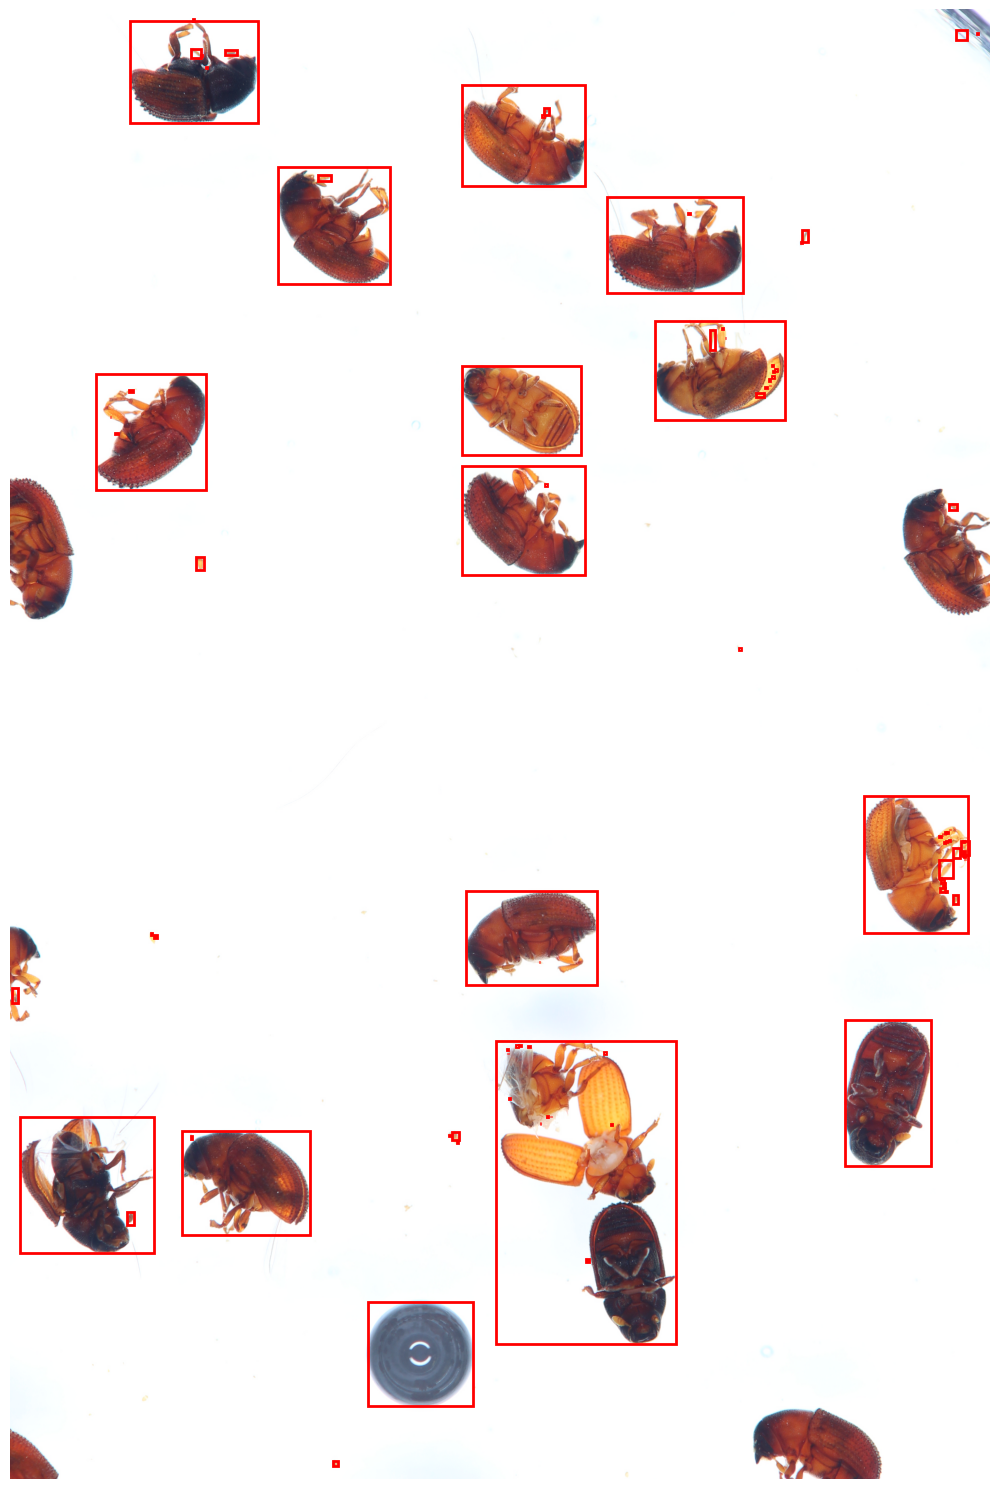

In [8]:
# plot boxes that will be used to extract 
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(ppi.image)
coord_df = ppi.image_properties_df
for i in range(len(coord_df)):
    data_i = coord_df.iloc[i]
    minr = data_i['bbox-0']
    minc = data_i['bbox-1']
    maxr = data_i['bbox-2']
    maxc =data_i['bbox-3']
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [9]:
# all artefacts dataframe
ppi.image_properties_df

centroid-0   centroid-1  bbox-0  bbox-1  bbox-2  bbox-3  orientation  \
0      38.304348   646.304348      36     644      42     649     0.507315   
1     263.402580   649.087751      43     423     401     874    -1.438501   
2      90.650000  3353.878571      74    3334     109    3375     0.859931   
3      85.000000  3412.000000      84    3411      87    3414    -0.785398   
4     152.886567   656.435821     139     639     172     673     0.845554   
..           ...          ...     ...     ...     ...     ...          ...   
102  4263.698651   424.218891    4243     411    4289     437    -0.410951   
103  4413.478261  2036.521739    4408    2032    4420    2042     0.316113   
104  4742.450980  1445.779179    4560    1261    4927    1632    -1.213089   
105  4616.000000  1308.000000    4616    1308    4617    1309     0.785398   
106  5129.652174  1145.972826    5120    1139    5138    1155     0.681798   

     axis_major_length  axis_minor_length    area  area_filled  kmeans_label  
0             6.461819           4.546659      23           23             0  
1           444.133677         291.693934   88216        88602             1  
2            52.559458           3.592688     140          140             0  
3             4.618802           0.000000       3            3             0  
4            45.408603          10.110237     335          335             0  
..                 ...                ...     ...          ...           ...  
102          45.719147          19.328193     667          667             0  
103          12.027443           9.816770      92           92             0  
104         372.895289         368.639474  105366       106706             1  
105           0.000000           0.000000       1            1             0  
106          18.966612          13.640352     184          184             0  

[107 rows x 12 columns]

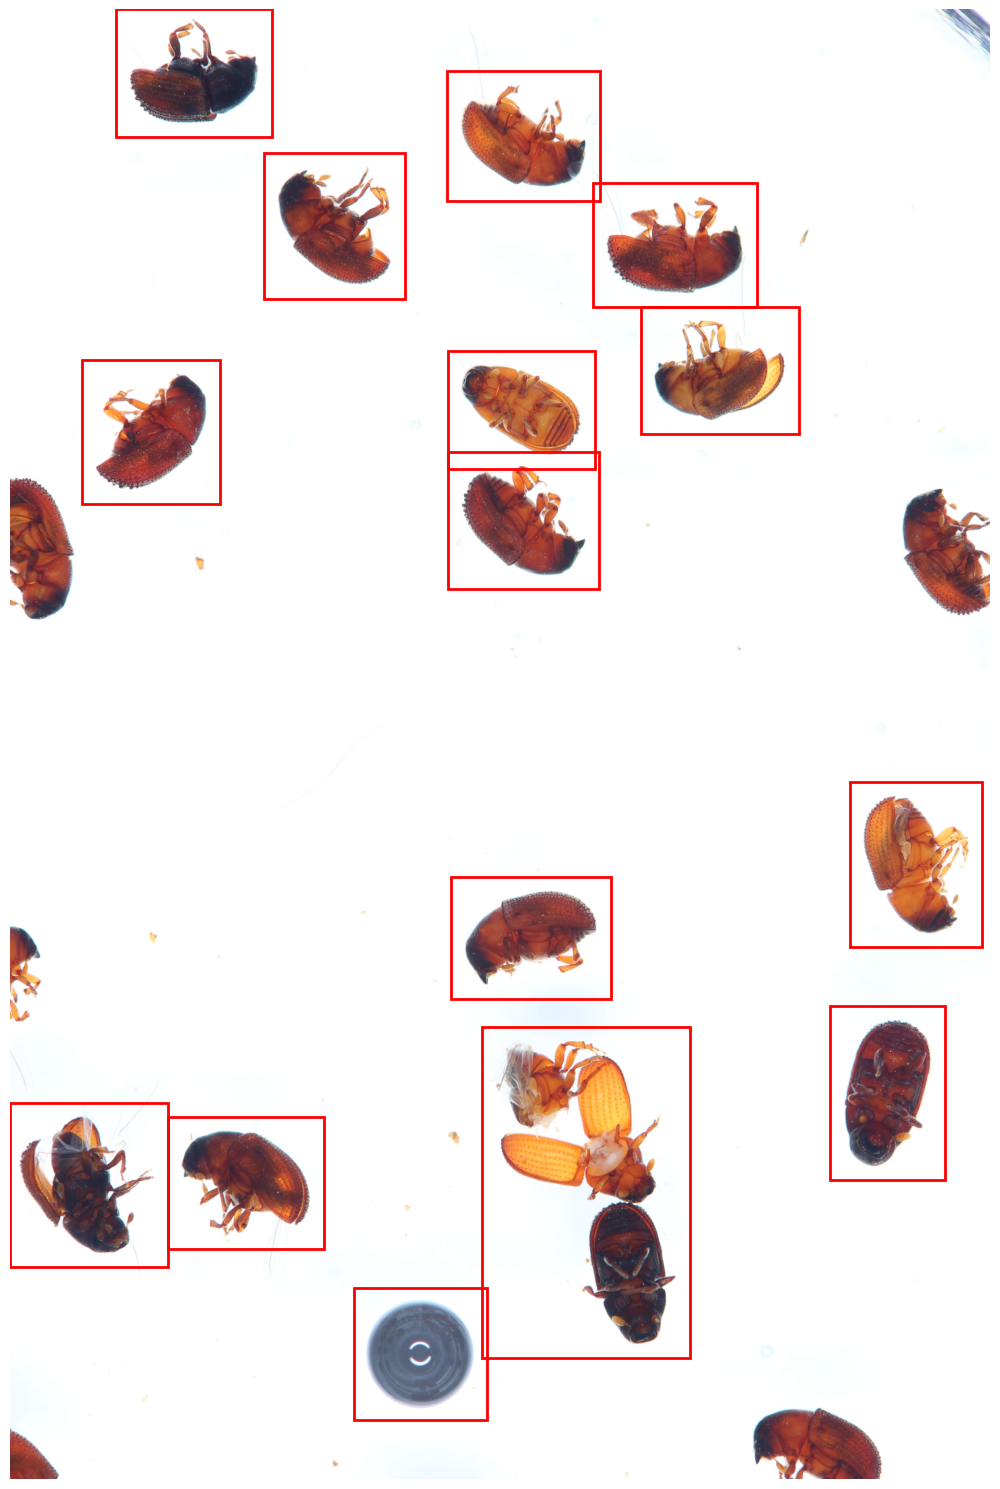

In [10]:
# plot boxes that will be used to extract 
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(ppi.image)
coord_df = ppi.image_selected_df
for i in range(len(coord_df)):
    data_i = coord_df.iloc[i]
    minr = data_i['bbox-0']
    minc = data_i['bbox-1']
    maxr = data_i['bbox-2']
    maxc =data_i['bbox-3']
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [11]:
ppi.image_selected_df

centroid-0   centroid-1  bbox-0  bbox-1  bbox-2  bbox-3  orientation  \
0    263.402580   649.087751       0     373     451     924    -1.438501   
1    475.385155  1801.438331     219    1542     675    2079     1.122943   
2    776.299418  1138.365790     508     896    1021    1391     0.784767   
3    860.825875  2348.436045     614    2055    1051    2633    -1.525050   
4   1303.428943  2489.377868    1049    2223    1499    2783    -1.447787   
5   1405.840415  1808.338327    1207    1544    1622    2062     1.060313   
6   1500.692325   511.206966    1236     253    1745     741    -0.742037   
7   1814.734423  1796.814580    1561    1543    2046    2078     0.856807   
8   3012.710050  3170.577072    2726    2961    3309    3427     0.355064   
9   3258.080694  1832.893519    3061    1556    3490    2118    -1.275285   
10  3812.980499  3088.953251    3516    2893    4130    3296    -0.240370   
11  4118.129679  2063.704681    3590    1665    4757    2398     0.372310   
12  4154.455499   248.690395    3856       0    4436     556     0.456714   
13  4120.278817   837.980597    3907     556    4374    1108     1.124263   
14  4742.450980  1445.779179    4510    1211    4977    1682    -1.213089   

    axis_major_length  axis_minor_length    area  area_filled  kmeans_label  
0          444.133677         291.693934   88216        88602             1  
1          468.657967         265.493396   91075        91485             1  
2          464.756649         314.018904   97135        97736             1  
3          482.717868         294.414642   99515        99779             1  
4          435.757789         281.800249   84503        84683             1  
5          456.356861         239.429496   85033        85199             1  
6          462.374071         283.860641   93199        96761             1  
7          465.639640         288.684487   98668        99194             1  
8          510.951668         275.776057  102859       104503             1  
9          485.762399         267.193820   95125        95954             1  
10         529.444579         276.422542  114098       114141             1  
11        1207.158397         434.187052  293100       297269             1  
12         486.556134         339.636715  111245       111933             1  
13         468.823576         308.710469  104366       105259             1  
14         372.895289         368.639474  105366       106706             1

All images printed (15)


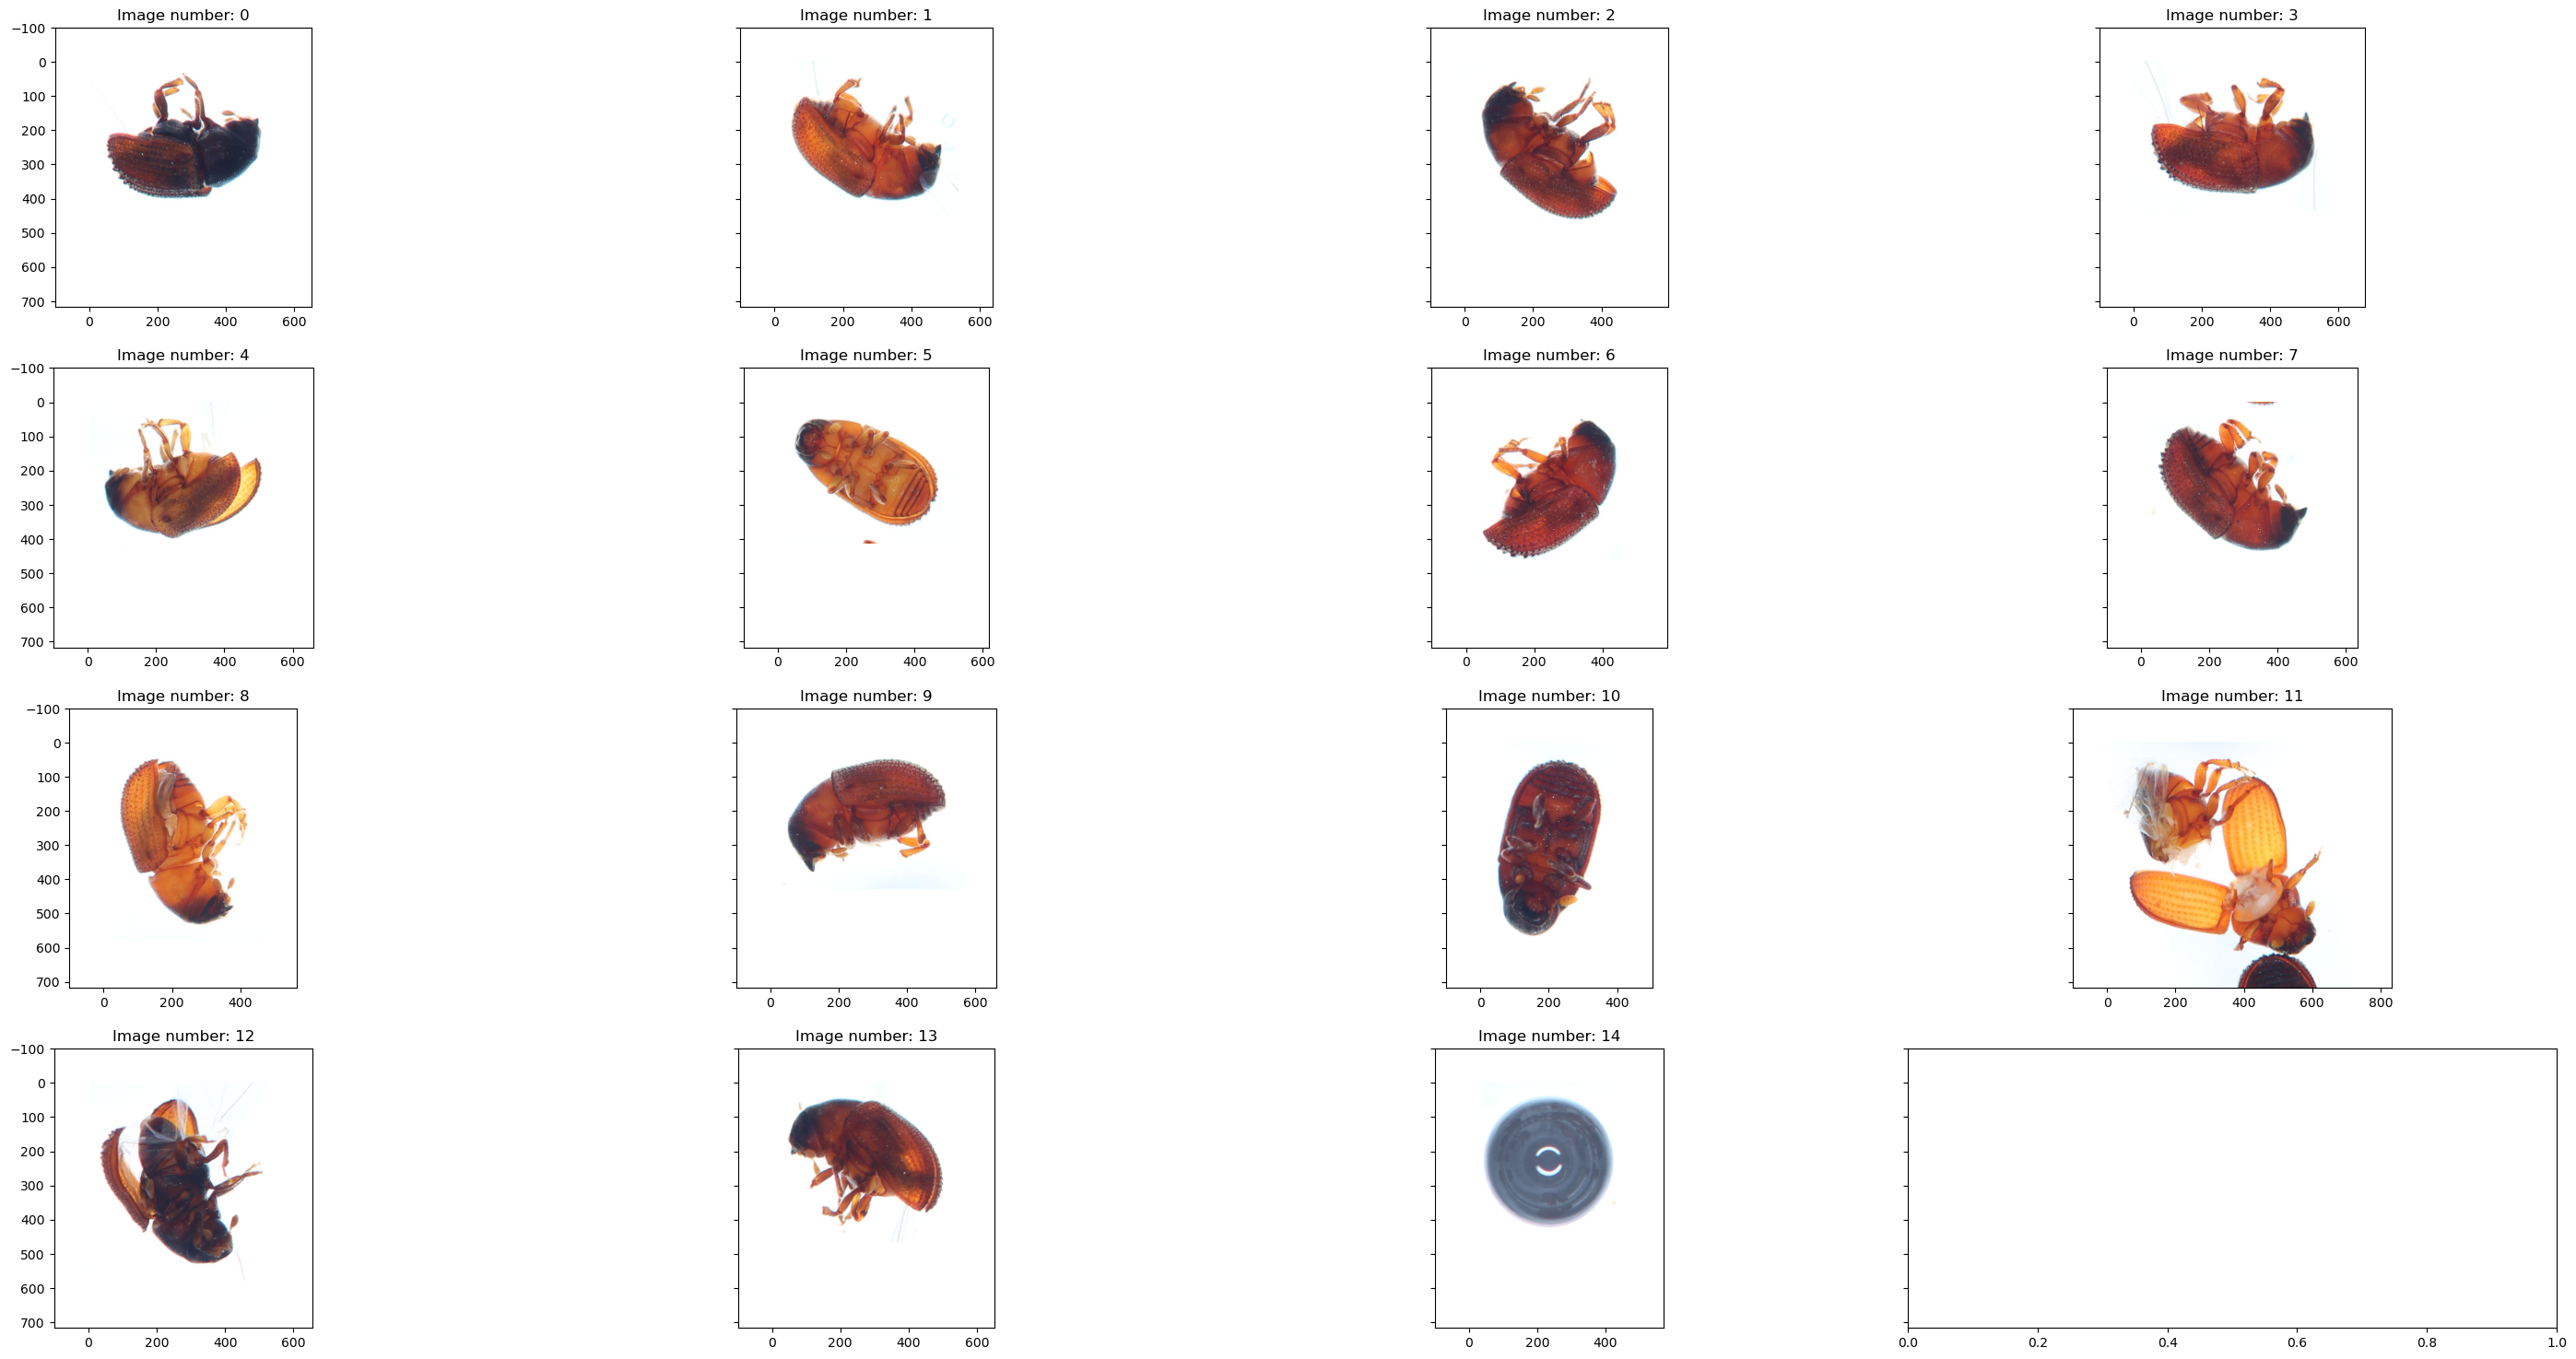

In [12]:
# define list of images
img_lst = ppi.col_image_lst

# plot pixel distribution values for all images in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
fig.set_figheight(15)
l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = axes[i][j].imshow(img_lst[l])
            axes[i][j].set_ylim(img_lst[l].shape[0]+ppi.image_edge_buffer*5, 0-ppi.image_edge_buffer*2)
            axes[i][j].set_xlim(0-ppi.image_edge_buffer*2, img_lst[l].shape[1]+ppi.image_edge_buffer*2)
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()

# Detect the outlier segment (ball bearing) from the compound image

In [13]:
# detect outlier 
ppi.detect_outlier()

All images printed (15)


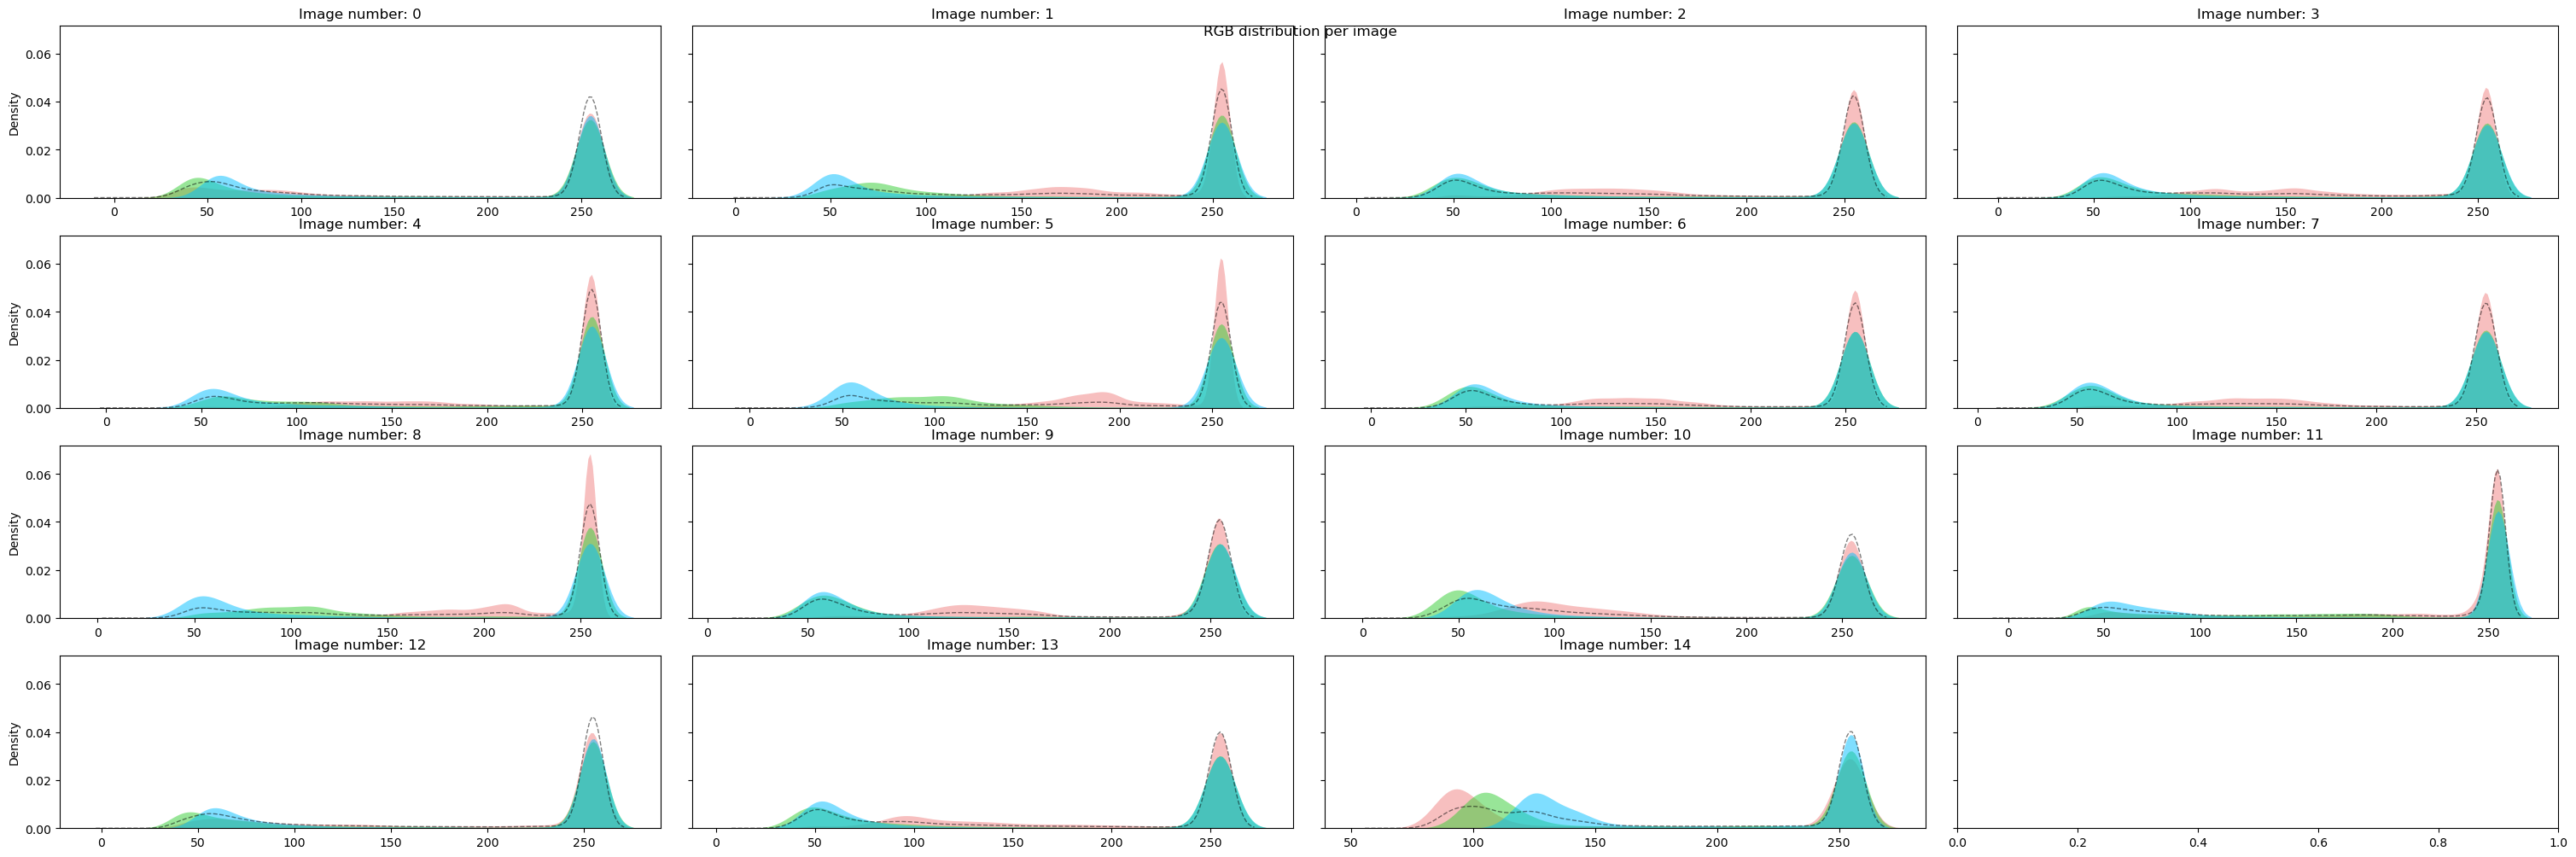

In [14]:
# plot pixel distribution values for all iamges in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
fig.suptitle('RGB distribution per image')

# initialize lists to store data in
r_ar_lst = ppi.r_ar_lst
g_ar_lst = ppi.g_ar_lst
b_ar_lst = ppi.b_ar_lst
all_ar_lst = ppi.all_ar_lst

l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = sns.kdeplot(ax=axes[i][j], data=r_ar_lst[l], color='lightcoral', fill=True, alpha=.5, linewidth=0)
            fig = sns.kdeplot(ax=axes[i][j], data=g_ar_lst[l], color='limegreen', fill=True, alpha=.5, linewidth=0)
            fig = sns.kdeplot(ax=axes[i][j], data=b_ar_lst[l], color='deepskyblue', fill=True, alpha=.5, linewidth=0)
            fig = sns.kdeplot(ax=axes[i][j], data=all_ar_lst[l], color='black', fill=False, alpha=.5, linewidth=1, linestyle='--')
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()
# fig.figure.savefig("Image_RGB_density_distribution.png")

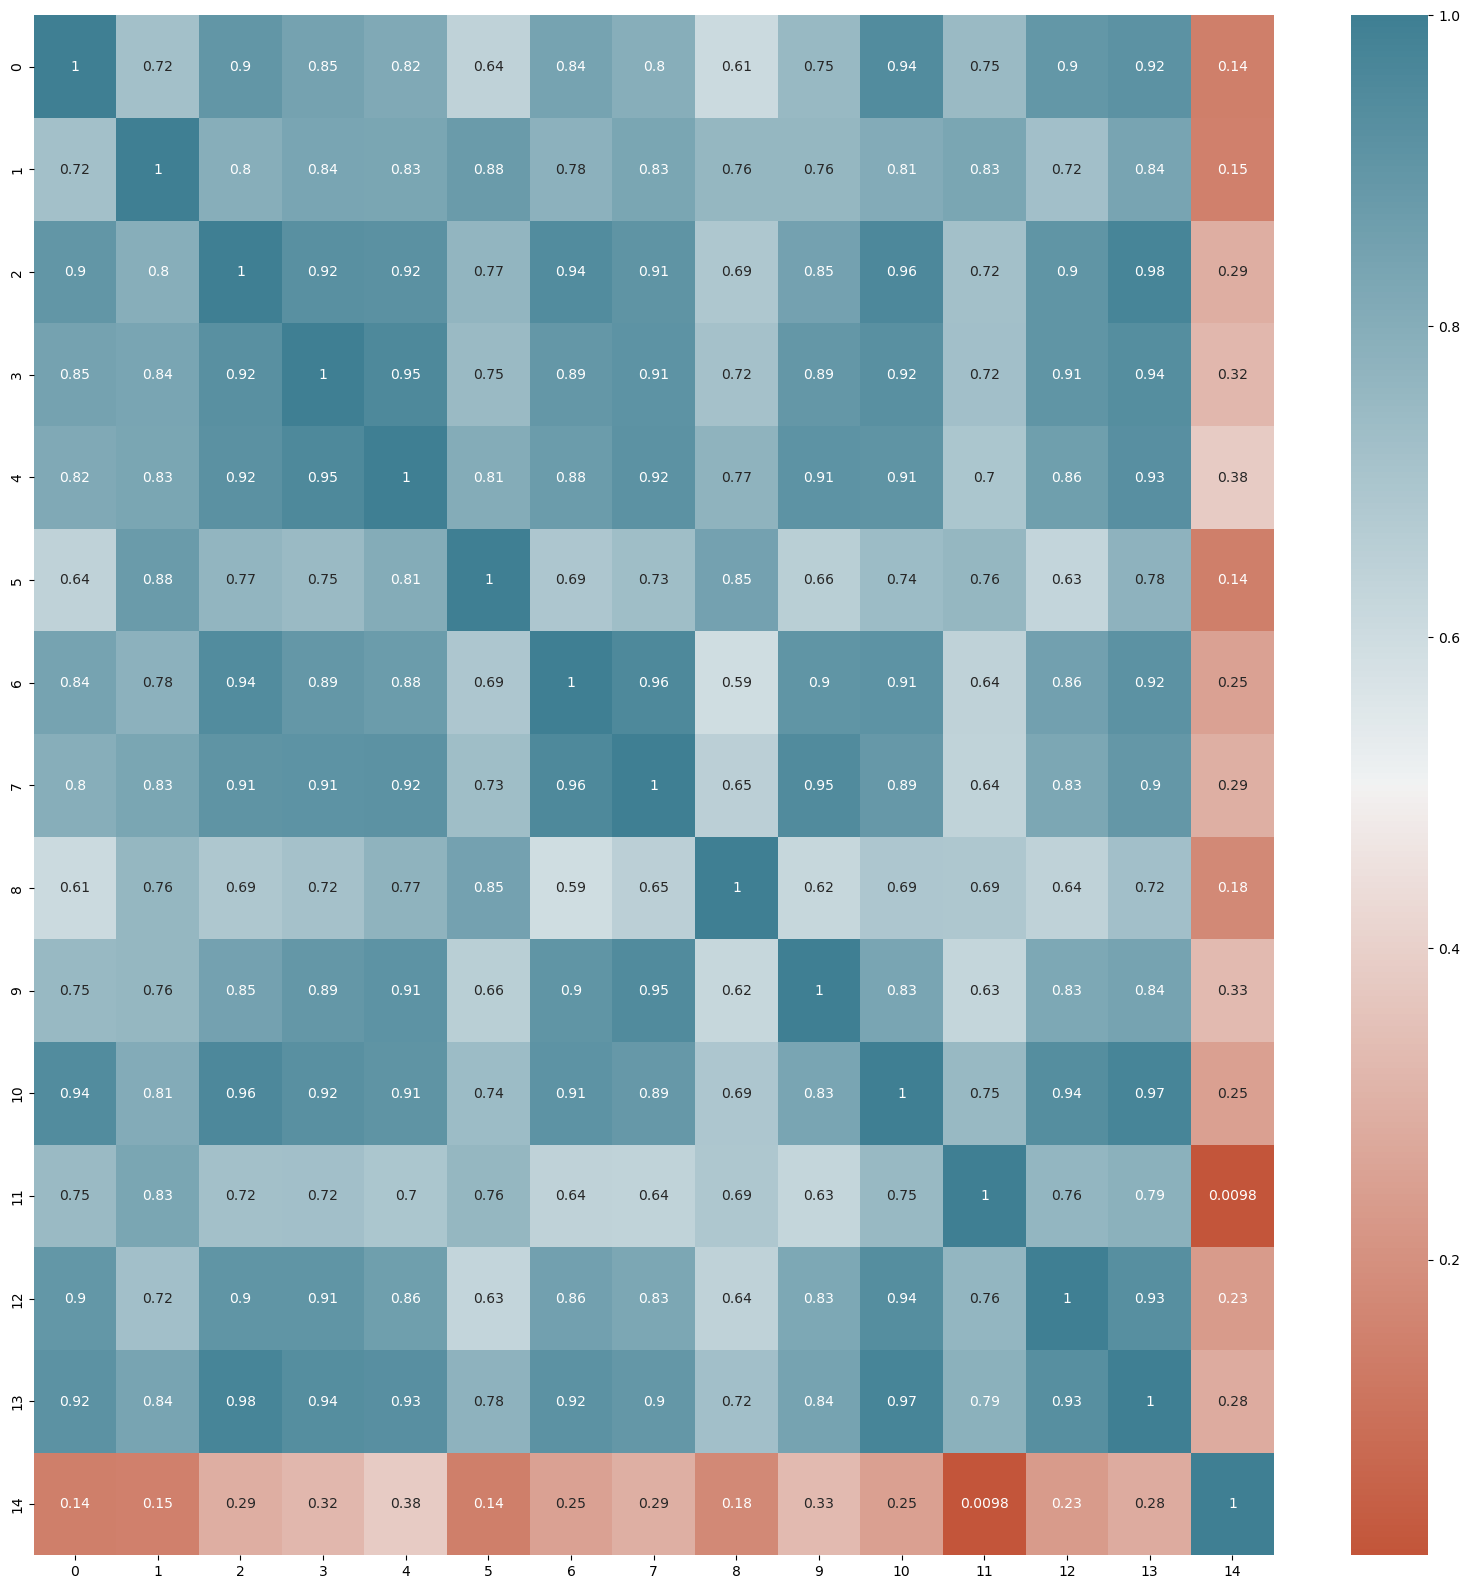

In [15]:
# Spearman correlation heatmap
corr_df = ppi.corr_coef
plt.figure(figsize=(20,20))
sns.heatmap(corr_df, annot=True, cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.show()

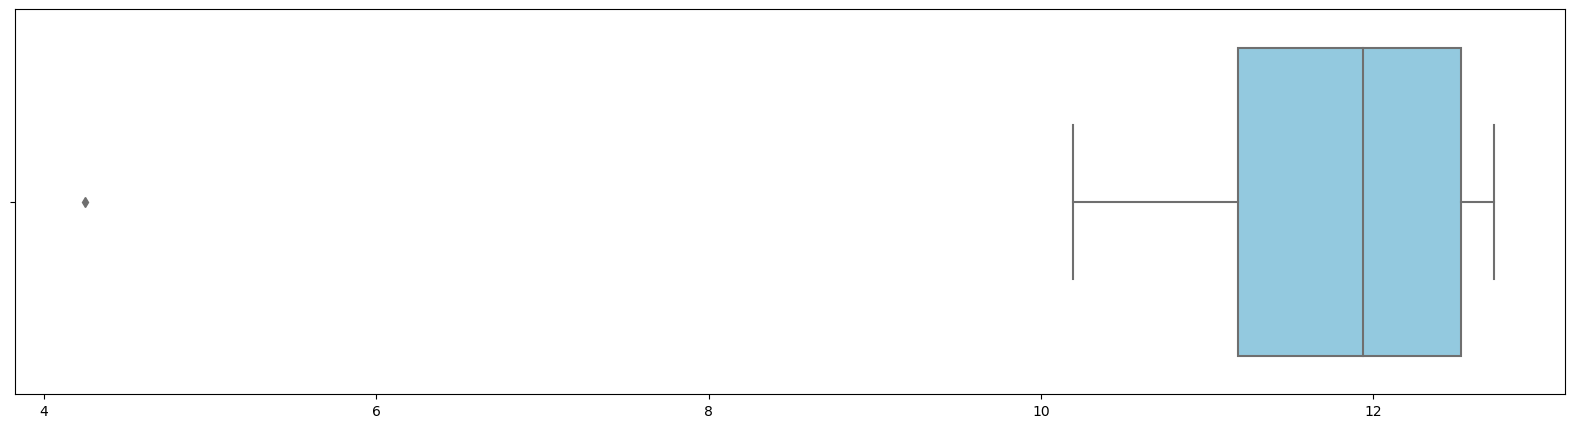

In [16]:
# plot boxplot of summmed correlation
plt.figure(figsize=(20, 5))
sns.boxplot(x=ppi.corr_coef_sum, color='skyblue')
# sns.violinplot(x=ppi.corr_coef_sum, inner="stick", color='skyblue')
plt.show()

In [17]:
list(ppi.corr_coef_sum)

[11.578372913900639,
 11.54528751663387,
 12.551592856761753,
 12.536745162106302,
 12.586457586424544,
 10.821973741394968,
 12.060669292015607,
 12.203695278893427,
 10.19071271906034,
 11.759198728634606,
 12.52175779292812,
 10.379354259622119,
 11.940890517072548,
 12.728624216686034,
 4.250067665238808]

# Estimate size

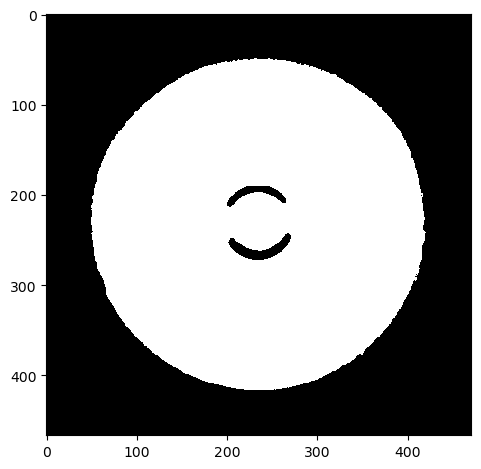

In [18]:
io.imshow(ppi.inv_bw_image_lst[ppi.outlier_idx])

In [19]:
ppi.estimate_size(outlier_idx=ppi.outlier_idx, 
                          known_radius=1, 
                          canny_sigma=5)

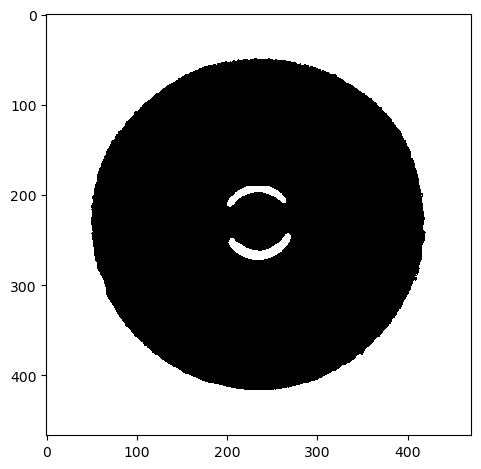

In [20]:
# print image detected as the outlier
io.imshow(ppi.outlier_bw_image)
plt.show()

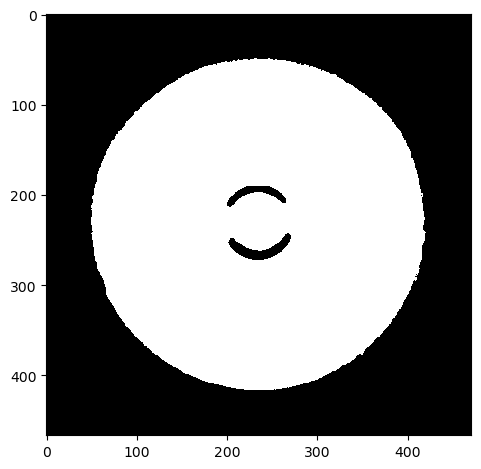

In [21]:
# print image detected as the outlier
bw_img = np.copy(ppi.inv_bw_image_lst[ppi.outlier_idx])
io.imshow(bw_img)
plt.show()

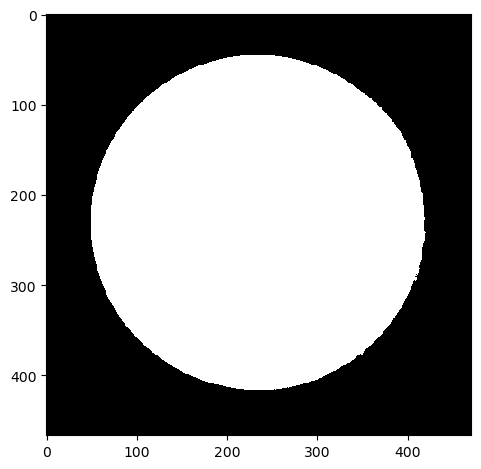

In [22]:
# print image detected as the outlier
io.imshow(ppi.clean_inv_bw_image_lst[ppi.outlier_idx])
plt.show()

All images printed (15)


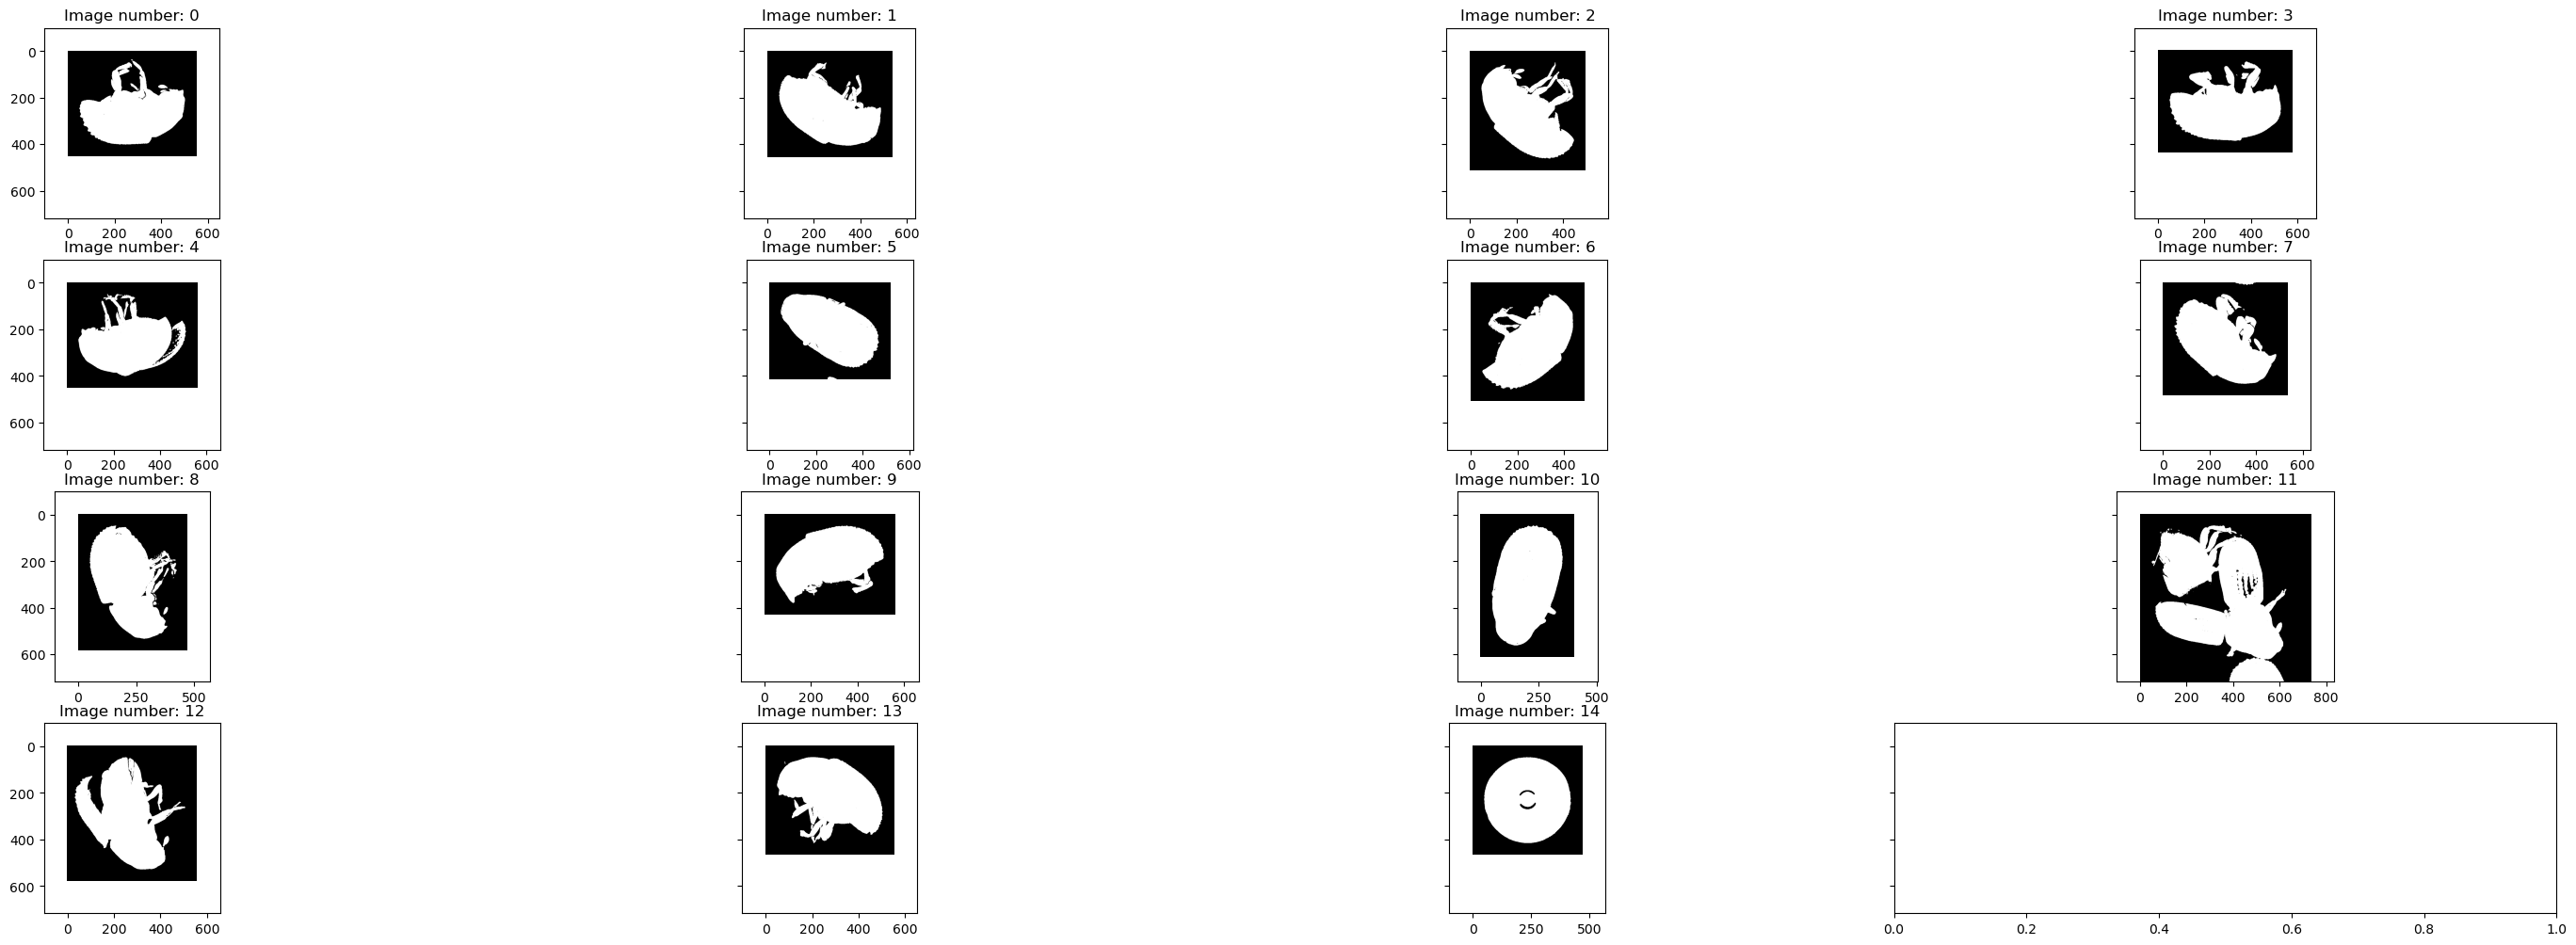

In [23]:
# define list of images
img_lst = ppi.inv_bw_image_lst

# plot pixel distribution values for all iamges in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = axes[i][j].imshow(np.invert(img_lst[l]), cmap='Greys')
            axes[i][j].set_ylim(img_lst[l].shape[0]+ppi.image_edge_buffer*5, 0-ppi.image_edge_buffer*2)
            axes[i][j].set_xlim(0-ppi.image_edge_buffer*2, img_lst[l].shape[1]+ppi.image_edge_buffer*2)
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()

All images printed (15)


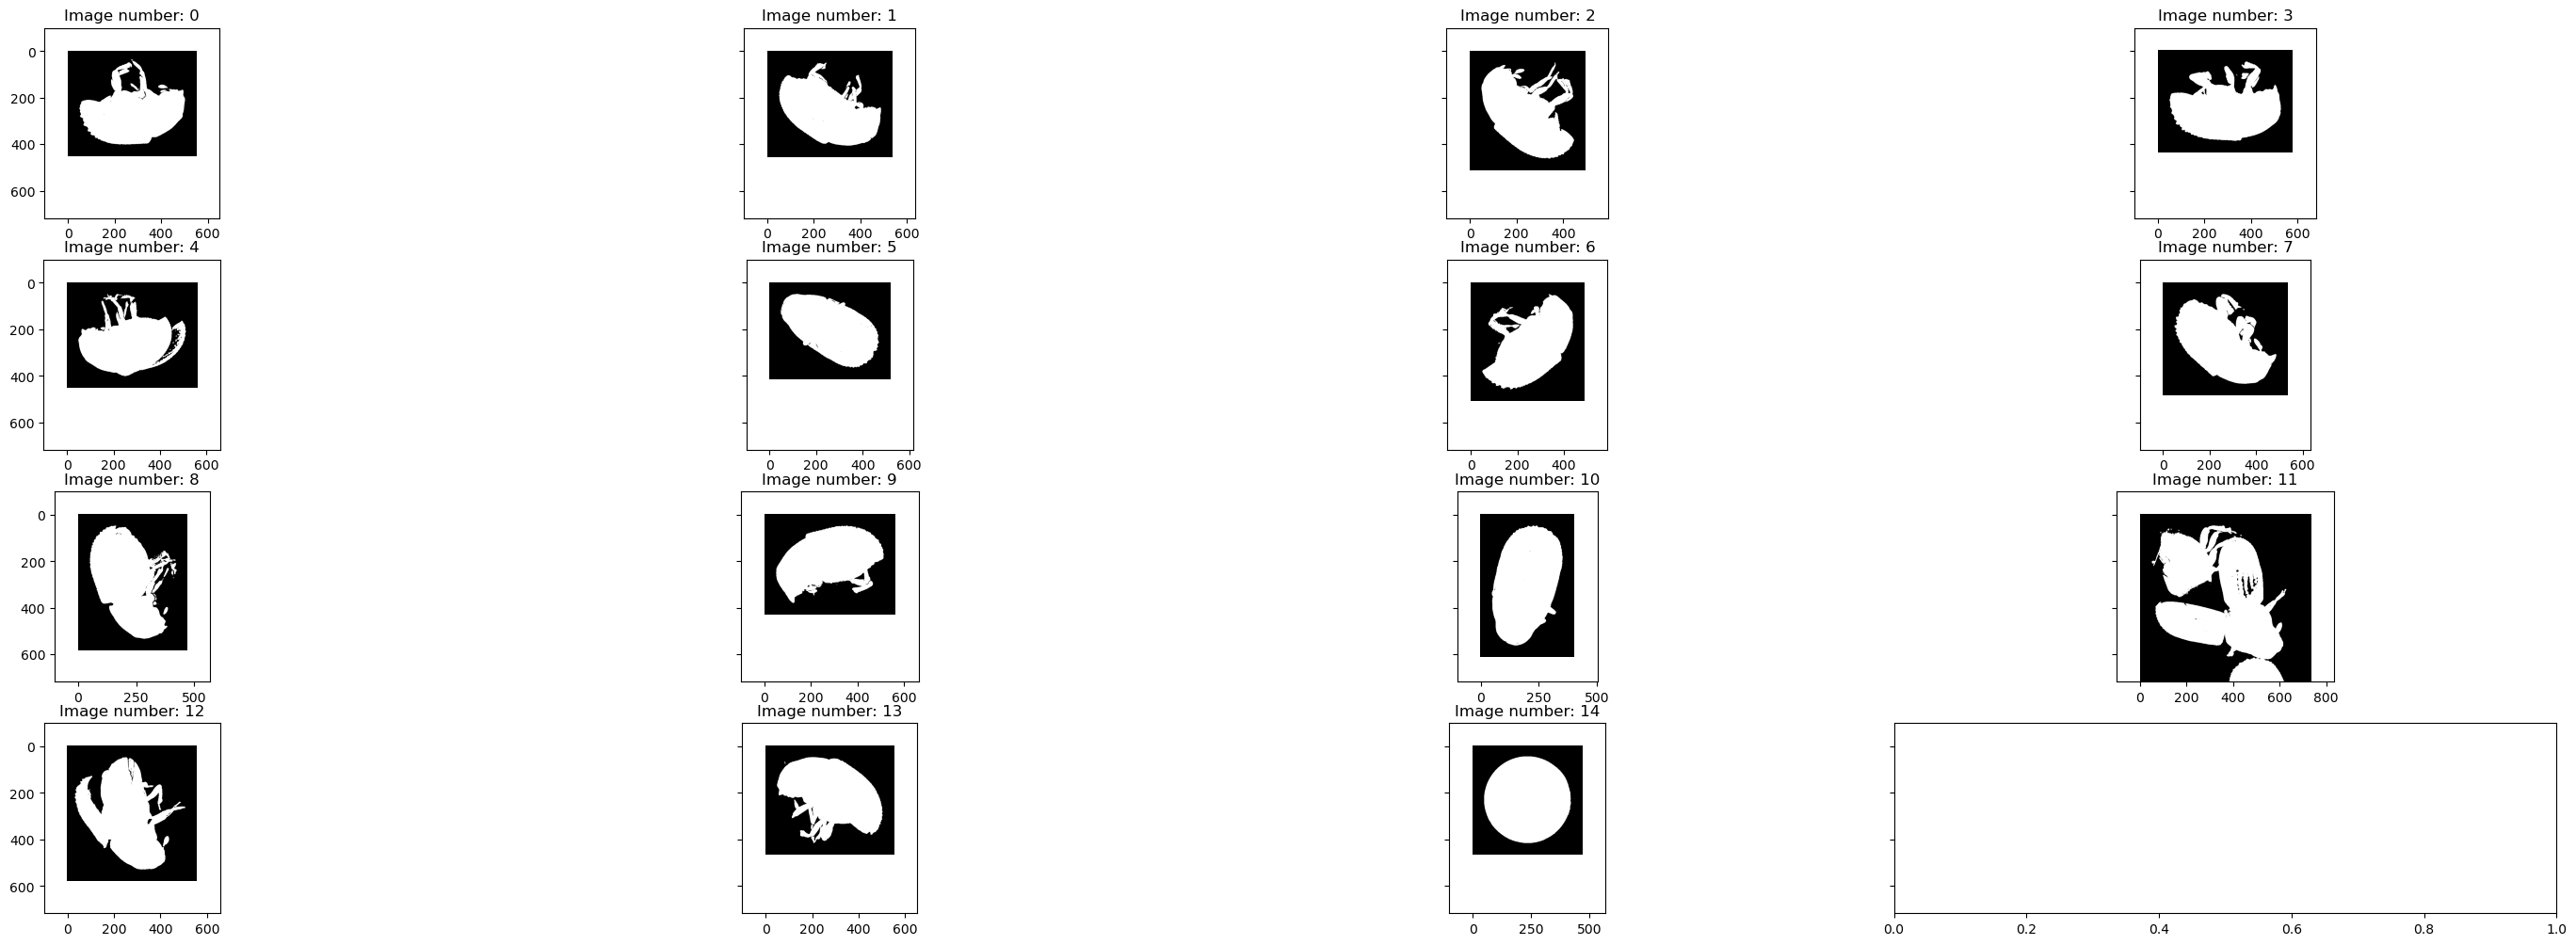

In [24]:
# define list of images
img_lst = ppi.clean_inv_bw_image_lst

# plot pixel distribution values for all iamges in a class
fig_rows = 4
fig_cols = ceil(len(img_lst)/fig_rows)

# define plot layout
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(30, 10), sharey=True)
fig.tight_layout()
l=0
for i in range(0,fig_rows):
    for j in range(0,fig_cols):
        if l < len(img_lst):
            # plot data
            fig = axes[i][j].imshow(np.invert(img_lst[l]), cmap='Greys')
            axes[i][j].set_ylim(img_lst[l].shape[0]+ppi.image_edge_buffer*5, 0-ppi.image_edge_buffer*2)
            axes[i][j].set_xlim(0-ppi.image_edge_buffer*2, img_lst[l].shape[1]+ppi.image_edge_buffer*2)
            fig = axes[i][j].set_title('Image number: '+str(l))
            l += 1
        else:
            print("All images printed ("+str(l)+")")
plt.show()

In [25]:
ppi.image_selected_df

centroid-0   centroid-1  bbox-0  bbox-1  bbox-2  bbox-3  orientation  \
0    263.402580   649.087751       0     373     451     924    -1.438501   
1    475.385155  1801.438331     219    1542     675    2079     1.122943   
2    776.299418  1138.365790     508     896    1021    1391     0.784767   
3    860.825875  2348.436045     614    2055    1051    2633    -1.525050   
4   1303.428943  2489.377868    1049    2223    1499    2783    -1.447787   
5   1405.840415  1808.338327    1207    1544    1622    2062     1.060313   
6   1500.692325   511.206966    1236     253    1745     741    -0.742037   
7   1814.734423  1796.814580    1561    1543    2046    2078     0.856807   
8   3012.710050  3170.577072    2726    2961    3309    3427     0.355064   
9   3258.080694  1832.893519    3061    1556    3490    2118    -1.275285   
10  3812.980499  3088.953251    3516    2893    4130    3296    -0.240370   
11  4118.129679  2063.704681    3590    1665    4757    2398     0.372310   
12  4154.455499   248.690395    3856       0    4436     556     0.456714   
13  4120.278817   837.980597    3907     556    4374    1108     1.124263   
14  4742.450980  1445.779179    4510    1211    4977    1682    -1.213089   

    axis_major_length  axis_minor_length    area  area_filled  kmeans_label  \
0          444.133677         291.693934   88216        88602             1   
1          468.657967         265.493396   91075        91485             1   
2          464.756649         314.018904   97135        97736             1   
3          482.717868         294.414642   99515        99779             1   
4          435.757789         281.800249   84503        84683             1   
5          456.356861         239.429496   85033        85199             1   
6          462.374071         283.860641   93199        96761             1   
7          465.639640         288.684487   98668        99194             1   
8          510.951668         275.776057  102859       104503             1   
9          485.762399         267.193820   95125        95954             1   
10         529.444579         276.422542  114098       114141             1   
11        1207.158397         434.187052  293100       297269             1   
12         486.556134         339.636715  111245       111933             1   
13         468.823576         308.710469  104366       105259             1   
14         372.895289         368.639474  105366       106706             1   

   circle_class  pixel_count  real_area  
0    non_circle        89035   2.594054  
1    non_circle        91292   2.659813  
2    non_circle        97673   2.845724  
3    non_circle        99527   2.899741  
4    non_circle        85250   2.483778  
5    non_circle        85033   2.477455  
6    non_circle        93283   2.717821  
7    non_circle        98690   2.875355  
8    non_circle       105378   3.070211  
9    non_circle        95130   2.771634  
10   non_circle       114098   3.324270  
11   non_circle       293331   8.546264  
12   non_circle       111915   3.260668  
13   non_circle       104389   3.041397  
14       circle       107828   3.141593